In [203]:
%matplotlib inline
from fnmatch import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import xml.etree.ElementTree as ET
import re
import seaborn as sns
sns.set(rc={"figure.figsize": (16, 8)}, style='whitegrid')

In [179]:
def get_poll_xml(poll_id, to_file=True):
    xmlstr = requests.get(
        "http://charts.realclearpolitics.com/charts/{0}.xml".format(
            poll_id)).text
    if to_file:
        f = open('xml_workfile', 'w')
        f.write(xmlstr)
        return {'file_name': 'xml_workfile'}
    else:
        return xmlstr

def _strip(s):
    """This function removes non-letter characters from a word
    
    for example _strip('Hi there!') == 'Hi there'
    """
    return re.sub(r'[\W_]+', '', s)

def plot_colors(xml):
    """
    Given an XML document like the link above, returns a python dictionary
    that maps a graph title to a graph color.
    
    Both the title and color are parsed from attributes of the <graph> tag:
    <graph title="the title", color="#ff0000"> -> {'the title': '#ff0000'}
    
    These colors are in "hex string" format. This page explains them:
    http://coding.smashingmagazine.com/2012/10/04/the-code-side-of-color/
    
    Example
    -------
    >>> plot_colors(get_poll_xml(1044))
    {u'Approve': u'#000000', u'Disapprove': u'#FF0000'}
    """
    dom = web.Element(xml)
    result = {}
    for graph in dom.by_tag('graph'):
        title = _strip(graph.attributes['title'])
        result[title] = graph.attributes['color']
    return result

In [180]:
romney_obama = get_poll_xml(1171)
romney_obama_text = get_poll_xml(1171, False)
ro_xml = ET.parse(romney_obama['file_name'])

In [181]:
root = ro_xml.getroot()
series = pd.to_datetime([root[0][i].text for i in range(len(root[0]))])
romney = pd.to_numeric(pd.Series([root[1][1][i].text for i in range(len(root[1][1]))], name=root[1][1].attrib['title']))
obama = pd.to_numeric(pd.Series([root[1][0][i].text for i in range(len(root[1][1]))], name=root[1][0].attrib['title']))

In [182]:
dat = pd.DataFrame({'Date':series, romney.name: romney, obama.name:obama})

In [183]:
dat = dat[:-7]

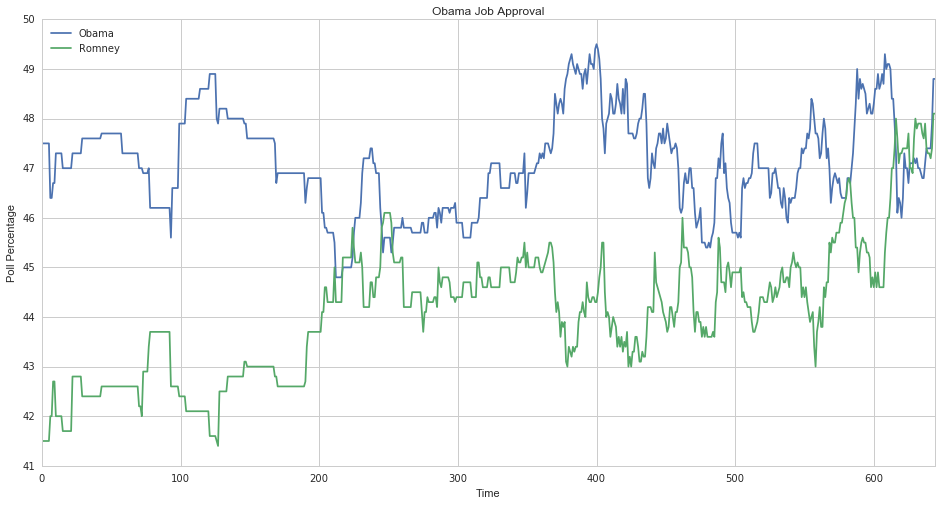

In [204]:
dat.Obama.plot(legend=True, title='Obama Job Approval')
dat.Romney.plot(legend=True)
plt.xlabel("Time")
plt.ylabel("Poll Percentage")
